In [1]:
import pandas as pd
import numpy as np
import os
import glob
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from math import cos, pi, radians
from numpy import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
def preprocess_data(data, is_train=True):
    
    temp = data.copy()
    temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]

    if is_train==True:          
    
        temp['Target1'] = temp['TARGET'].shift(-48).fillna(method='ffill')
        temp['Target2'] = temp['TARGET'].shift(-48*2).fillna(method='ffill')
        temp = temp.dropna()
        
        return temp.iloc[:-96]

    elif is_train==False:
        
        temp = temp[['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T']]
                              
        return temp.iloc[-48:, :]

In [3]:
train = pd.read_csv('./data/train/train.csv')

test = []

for i in range(81):
    file_path = './data/test/' + str(i) + '.csv'
    temp = pd.read_csv(file_path)
    temp = preprocess_data(temp, is_train=False)
    test.append(temp)

df_test = pd.concat(test)

submission = pd.read_csv('./data/sample_submission.csv')

In [4]:
df_train = preprocess_data(train)

df_train.shape, df_test.shape

((52464, 9), (3888, 7))

In [5]:
angle = []
for i in range(0,9):
    angle.append(i*11.25)
for i in range(0,9):    
    angle.append(90-i*11.25)
    
arr = []

for i in range(1, 48+1):
    if (i <= 16 or i >= 35):
        arr.append(0)
    else:
        arr.append(cos(90-angle[i-17]))
    
print(arr)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.4480736161291701, -0.9779926124309412, -0.04422762066183892, 0.9557293436951722, 0.5253219888177297, -0.6912931286141072, -0.8733046400935156, 0.2516896500717544, 1.0, 1.0, 0.2516896500717544, -0.8733046400935156, -0.6912931286141072, 0.5253219888177297, 0.9557293436951722, -0.04422762066183892, -0.9779926124309412, -0.4480736161291701, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
df_train['theta'] = list(arr) * int(df_train.shape[0]/48)
df_train['GNI'] = df_train['DHI'] + df_train['DNI']*df_train['theta']
df_train.drop(['theta'], axis=1, inplace=True)
df_train.columns = ['Hour', 'TARGET', 'DHI', 'DNI', 'WS', 'RH', 'T', 'GNI', 'Target1', 'Target2']
df_train[:48]

,Hour,TARGET,DHI,DNI,WS,RH,T,GNI,Target1,Target2
0,0,0.000000,0,0,1.5,69.08,-12,0.000000,0.000000,0.000000
1,0,0.000000,0,0,1.5,69.06,-12,0.000000,0.000000,0.000000
2,1,0.000000,0,0,1.6,71.78,-12,0.000000,0.000000,0.000000
3,1,0.000000,0,0,1.6,71.75,-12,0.000000,0.000000,0.000000
4,2,0.000000,0,0,1.6,75.20,-12,0.000000,0.000000,0.000000
5,2,0.000000,0,0,1.5,69.29,-11,0.000000,0.000000,0.000000
6,3,0.000000,0,0,1.5,72.56,-11,0.000000,0.000000,0.000000
7,3,0.000000,0,0,1.4,72.55,-11,0.000000,0.000000,0.000000
8,4,0.000000,0,0,1.3,74.62,-11,0.000000,0.000000,0.000000
9,4,0.000000,0,0,1.3,74.61,-11,0.000000,0.000000,0.000000


In [7]:
df_test['theta'] = list(arr) * int(df_test.shape[0]/48)
df_test['GNI'] = df_test['DHI'] + df_test['DNI']*df_test['theta']
df_test.drop(['theta'], axis=1, inplace=True)
df_test[:48]

,Hour,TARGET,DHI,DNI,WS,RH,T,GNI
288,0,0.000000,0,0,0.8,80.92,-2.8,0.000000
289,0,0.000000,0,0,0.9,81.53,-2.9,0.000000
290,1,0.000000,0,0,1.0,79.91,-3.0,0.000000
291,1,0.000000,0,0,0.9,79.91,-3.0,0.000000
292,2,0.000000,0,0,0.9,77.20,-3.0,0.000000
293,2,0.000000,0,0,1.1,78.36,-3.2,0.000000
294,3,0.000000,0,0,1.2,76.78,-3.4,0.000000
295,3,0.000000,0,0,1.8,77.93,-3.6,0.000000
296,4,0.000000,0,0,2.4,76.89,-3.8,0.000000
297,4,0.000000,0,0,2.9,78.64,-4.1,0.000000


In [8]:
cols = ['Hour','DHI','DNI','WS','RH','T', 'GNI']

In [9]:
min = df_train[cols].min()
max  = df_train[cols].max()

In [10]:
for i, col in enumerate(cols):
    df_train[col] = (df_train[col] - min[i]) / (max[i] - min[i])
    df_test[col] = (df_test[col] - min[i]) / (max[i] - min[i])

In [51]:
Day  = df_train.loc[:, ['Hour','TARGET','GNI']] # ,'DHI','DNI','WS','RH','T'
Day7 = df_train.iloc[:, -2]
Day8 = df_train.iloc[:, -1]
Day78 = df_train.iloc[:, -2:]

In [52]:
Day.shape

(52464, 3)

In [38]:
def quantile_loss(q, y, pred):
    err = (y-pred)
    return mean(maximum(q*err, (q-1)*err), axis=-1)

In [39]:
q_lst = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_valid, Y_train, Y_valid = train_test_split(Day, Day78, test_size=0.25, random_state=42)

X_train_1, X_valid_1, Y_train_1, Y_valid_1 = train_test_split(Day, Day7, test_size=0.25, random_state=42)
X_train_2, X_valid_2, Y_train_2, Y_valid_2 = train_test_split(Day, Day8, test_size=0.25, random_state=42)

X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape

((39348, 3), (13116, 3), (39348, 2), (13116, 2))

In [15]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras.backend import mean, maximum

tf.random.set_seed(42)

In [27]:
epoch = 100

In [54]:
model = tf.keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(Day.shape)),
    #layers.Dense(20, activation='relu'),
    #layers.Dense(32, activation='relu'),
    #layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(2)
])

In [55]:
model.compile(loss='mse', optimizer='adam')
hist = model.fit(X_train, Y_train, epochs=epoch, batch_size=48, validation_split=0.25, 
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, mode='min', monitor='val_loss', verbose=1)])
model.evaluate(X_valid, Y_valid)

Epoch 1/10
615/615 [==============================] - 1s 1ms/step - loss: 45818.9518 - val_loss: 44863.3086
Epoch 2/10
615/615 [==============================] - 1s 1ms/step - loss: 43127.3164 - val_loss: 44932.2891
Epoch 3/10
615/615 [==============================] - 1s 960us/step - loss: 42697.9943 - val_loss: 44939.2031
Epoch 4/10
615/615 [==============================] - 1s 1ms/step - loss: 43702.6698 - val_loss: 44928.4570
Epoch 00004: early stopping
410/410 [==============================] - 0s 615us/step - loss: 43943.8672


43943.8671875

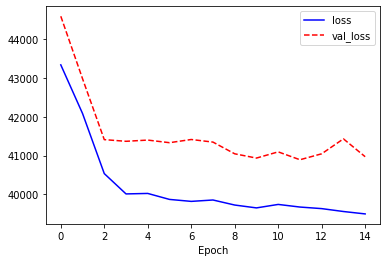

In [22]:
plt.plot(hist.history['loss'], 'b-', label='loss')
plt.plot(hist.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
results = pd.DataFrame()

for q in q_lst:
    model.compile(loss=lambda y,pred: quantile_loss(q,y,pred), optimizer='adam')
    model.fit(Day, Day78, epochs=epoch, batch_size=48, validation_split=0.25, 
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, mode='min', monitor='val_loss', verbose=1)])
    pred = pd.DataFrame(model.predict(df_test))
    results = pd.concat([results, pred], axis=1)

results.shape

In [ ]:
results[0], results[1]

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
def LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test):
    
    # (a) Modeling  
    model = LGBMRegressor(objective='quantile', alpha=q,
                         n_estimators=10000, bagging_fraction=0.7, learning_rate=0.027, subsample=0.7)                   
                         
                         
    model.fit(X_train, Y_train, eval_metric = ['quantile'], 
          eval_set=[(X_valid, Y_valid)], early_stopping_rounds=300, verbose=500)

    # (b) Predictions
    pred = pd.Series(model.predict(X_test).round(2))
    return pred, model

def train_data(X_train, Y_train, X_valid, Y_valid, X_test):

    LGBM_models=[]
    LGBM_actual_pred = pd.DataFrame()

    for q in q_lst:
        print(q)
        pred , model = LGBM(q, X_train, Y_train, X_valid, Y_valid, X_test)
        LGBM_models.append(model)
        LGBM_actual_pred = pd.concat([LGBM_actual_pred,pred],axis=1)

    LGBM_actual_pred.columns=q_lst
    
    return LGBM_models, LGBM_actual_pred

models_1, results_1 = train_data(X_train_1, Y_train_1, X_valid_1, Y_valid_1, df_test)
models_2, results_2 = train_data(X_train_2, Y_train_2, X_valid_2, Y_valid_2, df_test)

In [ ]:
res_L0 = pd.DataFrame(results_1.sort_index())
res_L0.columns = ['L00.1','L00.2','L00.3','L00.4','L00.5','L00.6','L00.7','L00.8','L00.9']
res_L1 = pd.DataFrame(results_1.sort_index())
res_L1.columns = ['L10.1','L10.2','L10.3','L10.4','L10.5','L10.6','L10.7','L10.8','L10.9']

res_D0 = pd.DataFrame(results[0].sort_index())
res_D0.columns = ['D00.1','D00.2','D00.3','D00.4','D00.5','D00.6','D00.7','D00.8','D00.9']
res_D1 = pd.DataFrame(results[1].sort_index())
res_D1.columns = ['D10.1','D10.2','D10.3','D10.4','D10.5','D10.6','D10.7','D10.8','D10.9']

In [ ]:
res_0 = pd.concat([res_L0, res_D0], axis=1)
res_1 = pd.concat([res_L1, res_D1], axis=1)

In [ ]:
res_0.loc[res_0[res_0['L00.1'] == 0].index, ['D00.1','D00.2','D00.3','D00.4','D00.5','D00.6','D00.7','D00.8','D00.9']] = 0
res_1.loc[res_1[res_1['L10.1'] == 0].index, ['D10.1','D10.2','D10.3','D10.4','D10.5','D10.6','D10.7','D10.8','D10.9']] = 0

In [ ]:
for i in range(1, 10):
    res_0["L00."+str(i)] = (res_0["L00."+str(i)] + res_0["D00."+str(i)])/2
    res_1["L10."+str(i)] = (res_1["L10."+str(i)] + res_1["D10."+str(i)])/2

In [ ]:
submission.loc[submission.id.str.contains("Day7"), "q_0.1":] = res_0[['L00.1','L00.2','L00.3','L00.4','L00.5','L00.6','L00.7','L00.8','L00.9']].values
submission.loc[submission.id.str.contains("Day8"), "q_0.1":] = res_1[['L10.1','L10.2','L10.3','L10.4','L10.5','L10.6','L10.7','L10.8','L10.9']].values
submission[:48]

In [ ]:
submission.to_csv('./submission/submission_20210118-3.csv', index=False)

In [ ]:
results_1.sort_index()[:48]

In [ ]:
results[0].sort_index()[:48]

In [ ]:
df_test[:48]